In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

import kaggle_ninja

from experiments.experiment_runner import run_experiment, run_experiment_grid
import experiments
from experiments import experiment_runner, fit_active_learning, fit_grid
from experiments.utils import *
from models.strategy import cosine_distance_normalized

from kaggle_ninja import *

In [ ]:
protein = '5ht6'
fingerprint = "ExtFP"
seed = 666

random = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_passive_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   base_experiment_kwargs={"strategy": "random_query",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed},
                                           "param_grid": {'C': list(np.logspace(-3,4,7))},
                                           "base_model_kwargs": { "loss": 'hinge'}})


uncertian = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_uncertain_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   base_experiment_kwargs={"strategy": "uncertanity_sampling",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed},
                                           "param_grid": {'C': list(np.logspace(-5,5,10))},
                                           "base_model_kwargs": { "loss": 'hinge'}})

In [ ]:
best_random_exp = get_best(random.experiments, "mean_mcc_valid")
best_uncertain_exp = get_best(uncertian.experiments, "mean_mcc_valid")

In [ ]:
plot_monitors([best_random_exp, best_uncertain_exp], folds='mean')

In [ ]:
calc_auc([best_random_exp, best_uncertain_exp], folds="mean")

In [ ]:
protein = '5ht6'
fingerprints = ["ExtFP"]
seed = 666

grid_result_greedy = run_experiment("fit_grid",
                                        recalculate_experiments=False,
                                        n_jobs = 2,
                                        experiment_detailed_name="fit_svm_greedy_%s_%s" % (protein, fingerprints),
                                        base_experiment="fit_active_learning",
                                        seed=666,
                                        grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                                       "base_model_kwargs:loss": ['hinge'],
                                                       "strategy_kwargs:c": list(np.linspace(0.1, 0.9, 9))},
                                        base_experiment_kwargs={"strategy": "quasi_greedy_batch",
                                                           "loader_function": "get_splitted_data",
                                                           "batch_size": 20,
                                                           "base_model": "LinearSVC",
                                                           "loader_args": {"n_folds": 2,
                                                                           "seed": 666}})

In [ ]:
best_greedy_exp = get_best(grid_result_greedy.experiments, "mean_mcc_valid")

In [ ]:
plot_monitors([best_passive_exp, best_uncertain_exp, best_greedy_exp], folds="mean")

# Balanced Models

In [3]:
protein = '5ht6'
fingerprint = "ExtFP"
seed = 666

In [11]:
twelm_uncertain = run_experiment("fit_grid",
                                 recalculate_experiments=False,
                                 n_jobs = 8,
                                 experiment_detailed_name="fit_TWELM_uncertain_%s_%s" % (protein, fingerprint),
                                 base_experiment="fit_active_learning",
                                 seed=666,
                                 base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                         "loader_function": "get_splitted_data",
                                                         "batch_size": 20,
                                                         "base_model": "TWELM",
                                                         "loader_args": {"n_folds": 2,
                                                                         "seed": seed},
                                                         "param_grid": {'C': list(np.logspace(-3,4,7))}})

fit_grid: 2015-06-05 21:43:44,663 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-05 21:43:44,663 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-05 21:43:44,663 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-05 21:43:44,663 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-05 21:43:44,664 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-05 21:43:44,664 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-05 21:43:44,664 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-05 21:43:44,664 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-05 21:43:44,666 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-05 21:43:44,666 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-05 21:43:44,666 - Ad

Loading  {'grid_params': {}, 'n_jobs': 8, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_TWELM_uncertain_5ht6_ExtFP', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'uncertainty_sampling', u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model': 'TWELM', u'param_grid': {u'C': [0.001, 0.014677992676220698, 0.21544346900318845, 3.1622776601683795, 46.415888336127821, 681.29206905796218, 10000.0]}}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


In [ ]:
eem_uncertainty = run_experiment("fit_grid",
                                 recalculate_experiments=False,
                                 n_jobs = 8,
                                 experiment_detailed_name="fit_EEM_uncertainty_%s_%s" % (protein, fingerprint),
                                 base_experiment="fit_active_learning",
                                 seed=666,
                                 base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                         "loader_function": "get_splitted_data",
                                                         "batch_size": 20,
                                                         "base_model": "EEM",
                                                         "loader_args": {"n_folds": 2,
                                                                         "seed": seed},
                                                         "param_grid": {'C': list(np.logspace(-3,4,7))}})


In [ ]:
svmtan_uncertainty = run_experiment("fit_grid",
                                    recalculate_experiments=False,
                                    n_jobs = 8,
                                    experiment_detailed_name="fit_SVMTAN_uncertainty_%s_%s" % (protein, fingerprint),
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                            "loader_function": "get_splitted_data",
                                                            "batch_size": 20,
                                                            "base_model": "SVMTAN",
                                                            "loader_args": {"n_folds": 2,
                                                                            "seed": seed},
                                                            "param_grid": {'C': list(np.logspace(-3,4,7))}})

In [ ]:
nb_uncertainty = run_experiment("fit_grid",
                                recalculate_experiments=False,
                                n_jobs = 8,
                                experiment_detailed_name="fit_NB_uncertainty_%s_%s" % (protein, fingerprint),
                                base_experiment="fit_active_learning",
                                seed=666,
                                base_experiment_kwargs={"strategy": "uncertainty_sampling",
                                                        "loader_function": "get_splitted_data",
                                                        "batch_size": 20,
                                                        "base_model": "RandomNB",
                                                        "loader_args": {"n_folds": 2,
                                                                        "seed": seed},
                                                        "param_grid": {'h': list(np.linspace(100,500,5))}})

In [23]:
best_twelm_exp = get_best(twelm_uncertain.experiments, "auc")
best_eem_exp = get_best(eem_uncertainty.experiments, "auc")
best_svmtan_exp = get_best(svmtan_uncertainty.experiments, "auc")
best_nb_exp = get_best(nb_uncertainty.experiments, "auc")

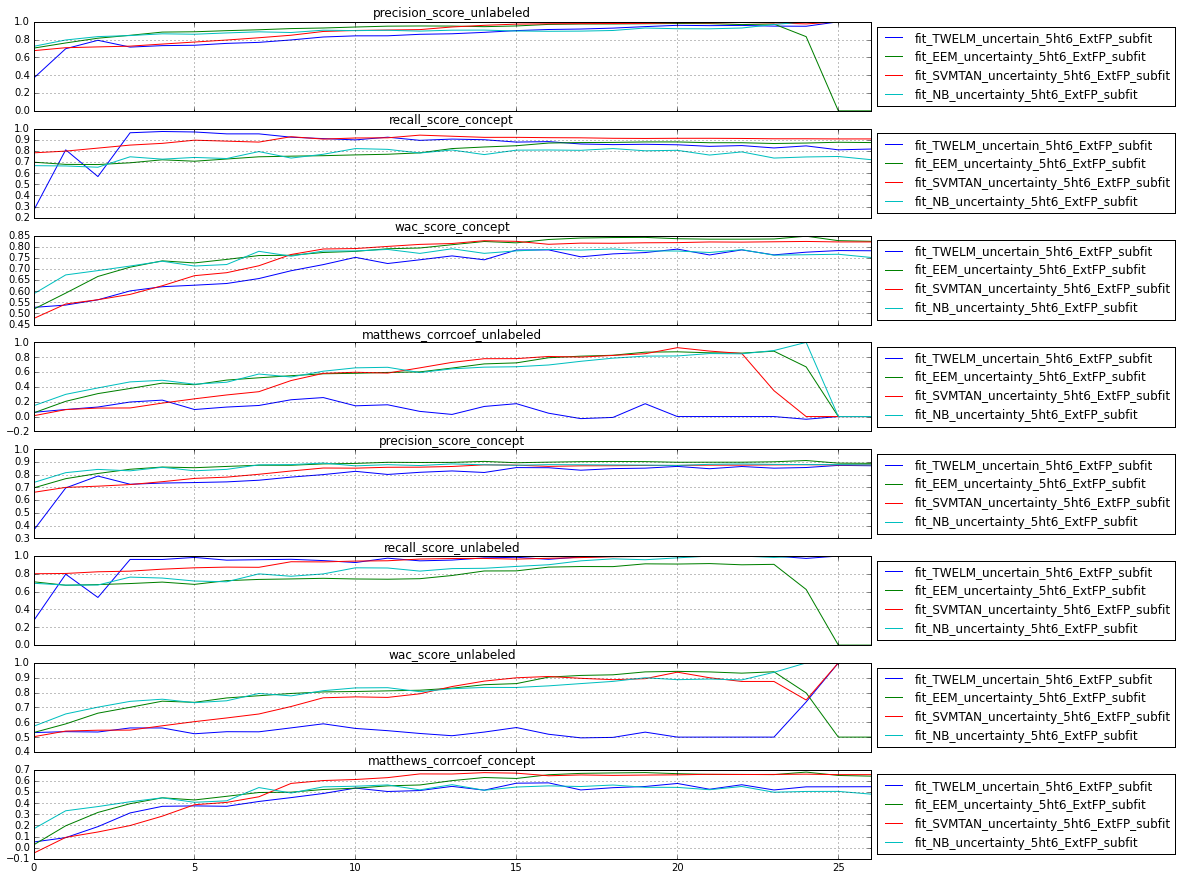

In [28]:
plot_monitors([best_twelm_exp, best_eem_exp, best_svmtan_exp, best_nb_exp], folds='mean')

In [7]:
best_twelm_exp = get_best(twelm_uncertain.experiments, "auc")
best_twelm_exp.monitors[0].keys()

['precision_score_unlabeled',
 'n_already_labeled',
 'recall_score_concept',
 'wac_score_concept',
 'iter',
 'matthews_corrcoef_unlabeled',
 'precision_score_concept',
 'recall_score_unlabeled',
 'wac_score_unlabeled',
 'matthews_corrcoef_concept']

In [12]:
twelm_uncertain.experiments[0].monitors[0].keys()

['precision_score_unlabeled',
 'n_already_labeled',
 'recall_score_concept',
 'wac_score_concept',
 'iter',
 'matthews_corrcoef_unlabeled',
 'precision_score_concept',
 'recall_score_unlabeled',
 'wac_score_unlabeled',
 'matthews_corrcoef_concept']